In [2]:
from sklearn.datasets import make_blobs
# centers=2, cluster_std 클러스터의 표준편차
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=0)

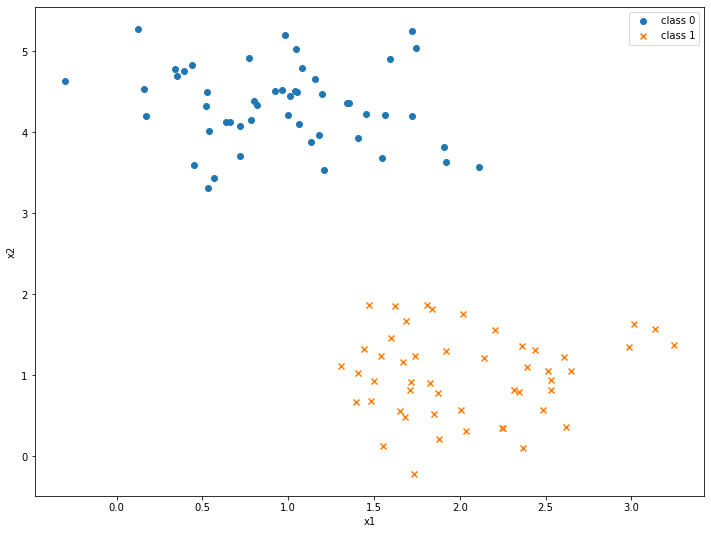

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.scatter(X[y == 0,0], X[y == 0,1], marker='o', label='class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [6]:
from sklearn.svm import SVC

model = SVC(kernel='linear').fit(X_train, y_train)

In [7]:
model.n_support_

array([2, 1])

In [8]:
model.support_

array([18, 43, 13])

In [9]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [11]:
import numpy as np
def plot_svc(model, ax=None):
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그리드 그래프
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    #판별함수에 입력
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P,
    levels = [-1, 0, 1], colors='k',
    linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:,0],
    model.support_vectors_[:,1],
    s=200)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

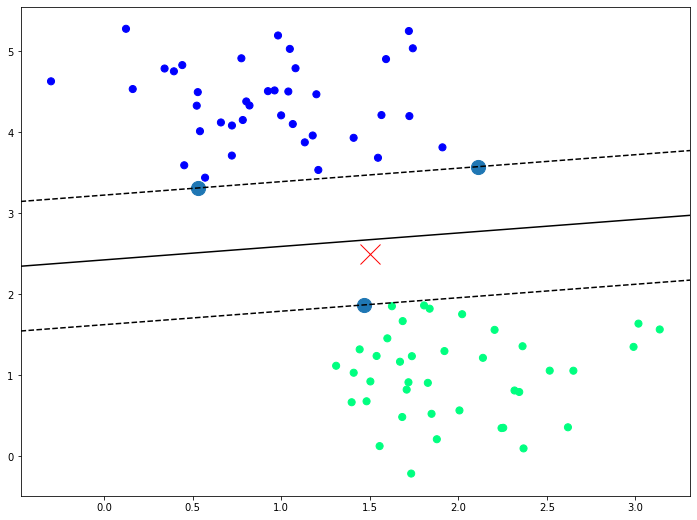

In [12]:
plt.figure(figsize=(12,9))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, cmap='winter')

X_new = [1.5, 2.5]
plt.plot(X_new[0], X_new[1], 'x', color='red', markersize = 20)
plot_svc(model)

In [13]:
model.predict([[1.5,2.5]])

array([1])

In [14]:
from sklearn.model_selection import GridSearchCV

params= {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01,
0.001, 0.00001, 10]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
print('Best Parameters:\n', grid.best_params_)
print('Best Estimators:\n', grid.best_estimator_)

Best Parameters:
 {'C': 0.1, 'gamma': 1}
Best Estimators:
 SVC(C=0.1, gamma=1)


In [15]:
model = grid.best_estimator_
model

SVC(C=0.1, gamma=1)

In [17]:
pred = model.predict(X_test)
print('학습용:', model.score(X_train, y_train))
print('검증용:', model.score(X_test, y_test))

학습용: 1.0
검증용: 1.0
